# Transformaciones de Señales

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Operaciones sobre señales

Se pueden realizar ciertas operaciones matemáticas sobre las señales, que pueden entenderse como transformaciones de las mismas.

***
### Superposición
Las señales pueden sumarse, lo que se conoce como el principio de superposición.

**Ejemplo:**

En el siguiente ejemplo las amplitudes de dos señales sinusoidales pueden variarse para ver la señal resultante.

In [1]:
import sympy as sym
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sym.init_printing()

t = sym.symbols('t', real=True)

def plot_func(A,B):    
    x = A*sym.cos(3*t) + B*sym.cos(5*t)
    sym.plot(x, (t, -5, 5), ylim=[-2, 2], y_ticks=[-2,2], ylabel=r'$x(t)$')


slider_A = widgets.FloatSlider(value=1,min=-1.,max=1.,step=0.1)  
slider_B = widgets.FloatSlider(value=0.5,min=-1,max=1.,step=0.1)  

interact(plot_func, A=slider_A, B=slider_B)

interactive(children=(FloatSlider(value=1.0, description='A', max=1.0, min=-1.0), FloatSlider(value=0.5, descr…

<function __main__.plot_func(A, B)>

***
### Desplazamiento  o desfase

Las señales pueden desplazarse. El desfase temporal de una señal $x(t)$ en una cantidad $\tau$ es una operación muy frecuente en el procesamiento de señales. 

El desfase se define como:

$$y(t) = x(t-\tau)$$
con $\tau \in \mathbb{R}$. La señal $x(t)$ se

* mueve hacia la derecha (*retrasa*) para $\tau > 0$
* mueve hacia la izquierda (*adelanta*) para $\tau < 0$

Una forma de ver comprobar esto es verificar donde queda el origen de la nueva señal trasladada respecto a la señal original. Para esto, se evalúa el argumento cuando es igual a cero.


**Ejemplo:**

En el siguiente ejemplo se utilizan desfases de una señal (rect), para construir otra señal compuesta con forma de una escalera. El rect primero se construye como la suma de dos escalones $u(t)$ desfasados:

$$ \sqcap(t) = u(t+\frac{1}{2}) - u(t-\frac{1}{2}) $$

Y luego la figura en forma de escalera se construye como:

$$ \sqcap(t-\frac{1}{2}) + \frac{2}{3}\sqcap(t-\frac{3}{2}) + \frac{1}{3}\sqcap(t-\frac{5}{2}) $$

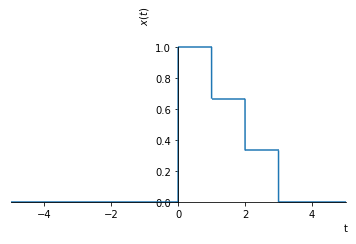

In [13]:
rect = sym.Heaviside(t + 1/2) - sym.Heaviside(t - 1/2)
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)

sym.plot(x, (t, -5, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

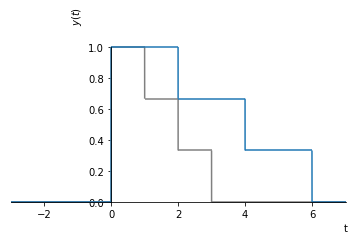

In [3]:
a = .5
y = x.subs(t, a*t)

px = sym.plot(x, (t, -3, 7), ylim=[-0.2, 1.2],
              ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a, 1/2), (t, -3, 7),
              ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejemplo:** 
    
Desplazamiento de una función Gauss.

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

time = np.linspace(-5,5,100)

def plot_func(tau):    
    plt.plot(time,np.exp(-np.pi*(time-tau)*(time-tau)))
    plt.xlim(-5, 5)
    plt.ylim(-0.5, 1.5)  
    plt.title("Gauss(t - %.1f)" %(tau))

    
slider_tau = widgets.FloatSlider(value=0.,min=-5.,max=5.,step=0.5)   

interact(plot_func, tau=slider_tau)



interactive(children=(FloatSlider(value=0.0, description='tau', max=5.0, min=-5.0, step=0.5), Output()), _dom_…

<function __main__.plot_func(tau)>

***
### Escalamiento

El escalamiento temporal de una señal $x(t)$ se define como

\begin{equation}
y(t) = x(a \cdot t)
\end{equation}

con $a \in \mathbb{R}$. La señal $x(t)$ se

* estrecha para $0 < a < 1$
* comprime para $a > 1$
* se reversa en el tiempo y se escala para $a < 0$

Una aplicación de esta operación en el procesamiento de señales y la adaptación de las escalas temporales para señales estándar y el modelamiento del [Efecto doppler](https://en.wikipedia.org/wiki/Doppler_effect).

**Ejemplo:**

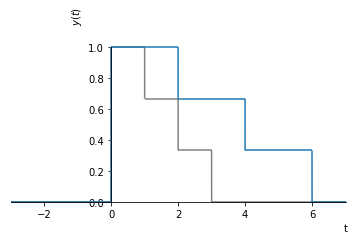

In [5]:
a = .5
y = x.subs(t, a*t)

px = sym.plot(x, (t, -3, 7), ylim=[-0.2, 1.2],
              ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a, 1/2), (t, -3, 7),
              ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejemplo:**
    
Escalamiento de una función Gauss.

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

time = np.linspace(-5,5,100)

def plot_func(a):    
    plt.plot(time,np.exp(-np.pi*(time)*(time)*a))
    plt.xlim(-5, 5)
    plt.ylim(-0.5, 1.5)    
    plt.title("Gauss(%.2f t)" %(a))
    
slider_a = widgets.FloatSlider(value=1.,min=0.01,max=10.,step=0.25)   

interact(plot_func, a=slider_a)



interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.01, step=0.25), Output()), _dom_…

<function __main__.plot_func(a)>

### Desfase y escalamiento

El desfase y escalamiento pueden ocurrir en forma simultánea en una señal.

**Ejemplo**

Desfase y escalamiento de una función Gauss.

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

time = np.linspace(-5,5,100)

def plot_func(a,tau):    
    plt.plot(time,np.exp(-np.pi*(time-tau)*(time-tau)*a))
    plt.xlim(-5, 5)
    plt.ylim(-0.5, 1.5)    
    plt.title("Gauss(%.2f (t - %.2f))" %(a,tau))
    
slider_a = widgets.FloatSlider(value=1.,min=0.01,max=10.,step=0.25)   
slider_tau = widgets.FloatSlider(value=0.,min=-5.,max=5.,step=0.5)   

interact(plot_func, a=slider_a, tau=slider_tau)

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.01, step=0.25), FloatSlider(valu…

<function __main__.plot_func(a, tau)>

### Reversión desplazada
La reversión desplazada de una señal $x(t)$ se define como

$$y(t) = x(\tau - t)$$

con $\tau \in \mathbb{R}$. Como $x(\tau - t) = x(- (t - \tau))$ esta operación también se puede representar como una reversión temporal seguida de un desfase de $\tau$ en la señal revertida. Para $\tau = 0$ esto solo es una reversión temporal de la señal. 

Esta operación se puede interpretar geométricamente como un espejamiento de la señal $x(t)$ respecto al eje vertical en el instance $t=\frac{\tau}{2}$.

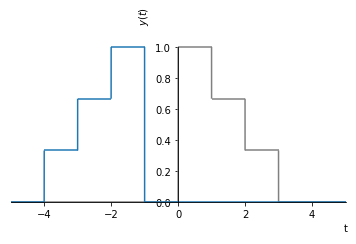

In [7]:
tau = -1
t = sym.symbols('t', real=True)
y = x.subs(t, tau - t)

px = sym.plot(x, (t, -5, 5), ylim=[-0.2, 1.2],
              ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y, (t, -5, 5), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejemplo: Desplazamiento de rects**

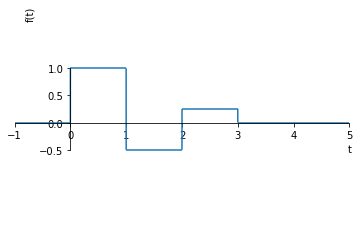

In [8]:
import sympy as sym

t = sym.symbols('t')

rect = sym.Heaviside(t + 1/2) - sym.Heaviside(t - 1/2)
x = rect.subs(t, t-1/2) - 0.5*rect.subs(t, t-3/2) + 0.25*rect.subs(t, t-5/2)

sym.plot(x, (t, -1, 5), ylim=[-2, 2]);

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>